# Data Understanding

(This document relates to question number 2)

- What pedagogical strategies developed by teachers seem to promote better reading performance (PISA 2018 - teacher context data)?
- What pedagogical strategies, according to the students' perspective, seem to promote better reading performance (PISA 2018 - student context data)?
- Do teachers and students have the same perceptions?

## **2.1 Collect Initial Data**

For this question we're using 2 datasets (https://www.oecd.org/en/data/datasets/pisa-2022-database.html):
- Students database 2018 (PISA)
- Teachers database 2018 (PISA)

The source datasets are in .sas7bdat format, that we converted to .csv with the following command:

In [96]:
"""
import pandas as pd

data = pd.read_sas(
    "../../../databases/2018/cy07_msu_stu_qqq.sas7bdat", format="sas7bdat"
)

data.to_csv("../../../databases/2018/student2018.csv", index=False)

data = pd.read_sas(
    "../../../databases/2018/cy07_msu_tch_qqq.sas7bdat", format="sas7bdat"
)

data.to_csv("../../../databases/2018/only_teacher2018.csv", index=False)

# Load the datasets
def get_dataset():
    merged_df1 = pd.read_csv('../databases/2018/student2018.csv')
    merged_df2 = pd.read_csv('../databases/2018/only_teacher2018.csv')
    merged_df1.merge(merged_df2, on=['CNT', 'CNTSCHID'], how='inner')
    return merged_df1

# Save the merged dataset to a CSV file
teacher_student = get_dataset()
teacher_student.to_csv('../databases/2018/teacher_student2018.csv', index=False)


"""

'\nimport pandas as pd\n\ndata = pd.read_sas(\n    "../../../databases/2018/cy07_msu_stu_qqq.sas7bdat", format="sas7bdat"\n)\n\ndata.to_csv("../../../databases/2018/student2018.csv", index=False)\n\ndata = pd.read_sas(\n    "../../../databases/2018/cy07_msu_tch_qqq.sas7bdat", format="sas7bdat"\n)\n\ndata.to_csv("../../../databases/2018/only_teacher2018.csv", index=False)\n\n# Load the datasets\ndef get_dataset():\n    merged_df1 = pd.read_csv(\'../databases/2018/student2018.csv\')\n    merged_df2 = pd.read_csv(\'../databases/2018/only_teacher2018.csv\')\n    merged_df1.merge(merged_df2, on=[\'CNT\', \'CNTSCHID\'], how=\'inner\')\n    return merged_df1\n\n# Save the merged dataset to a CSV file\nteacher_student = get_dataset()\nteacher_student.to_csv(\'../databases/2018/teacher_student2018.csv\', index=False)\n\n\n'

The teacher dataset does not have the information for the student's performance, we need to join them based on `CNT` and `CNTSCHID` columns (according to https://www.oecd.org/en/about/programmes/pisa/how-to-prepare-and-analyse-the-pisa-database.html)

In [97]:
"""
columns_to_keep = [
'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 'PV6READ', 'PV7READ', 'PV8READ', 'PV9READ', 'PV10READ',
'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'PV6SCIE', 'PV7SCIE', 'PV8SCIE', 'PV9SCIE', 'PV10SCIE',
'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV6MATH', 'PV7MATH', 'PV8MATH', 'PV9MATH', 'PV10MATH',
'CNT', 'CNTSCHID', 'REPEAT', 'ST001D01T', 'CNTSTUID'
]

# Function to load and merge datasets in chunks
def init_target_csv():
    with open("../databases/2018/teacher_student2018.csv", 'w') as file:
        pass # Do nothing, just open and close the file

    df1 = pd.read_csv('../databases/2018/student2018.csv', nrows=10)
    df2 = pd.read_csv('../databases/2018/only_teacher2018.csv', nrows=10)

    df1 = df1[columns_to_keep]

    df_result = pd.DataFrame(columns=(df1.columns.append(df2.columns)).unique())
    df_result.to_csv("../databases/2018/teacher_student2018.csv", index_label=False)

# Function to load and merge datasets in chunks
def get_dataset_in_chunks(chunk_size):
    chunks = []
    i=0
    for chunk in pd.read_csv('../databases/2018/student2018.csv', chunksize=chunk_size):
        i=i+1
        print("i=",i,flush=True)
        chunk = chunk[columns_to_keep]

        merged_chunk = pd.merge(chunk, pd.read_csv('../databases/2018/only_teacher2018.csv'), on=['CNT', 'CNTSCHID'])
        merged_chunk.to_csv("../databases/2018/teacher_student2018.csv", mode="a", header=False, index=False)
        #print(merged_chunk.head(), flush=True)
        #chunks.append(merged_chunk)
    #return pd.concat(chunks, ignore_index=True)

# Define the chunk size
chunk_size = 50000 # Adjust the chunk size based on your memory capacity

init_target_csv()
# Perform the merge in chunks
get_dataset_in_chunks(chunk_size)

print("Merge completed and saved to 'teacher_student2018.csv'.")

"""

'\ncolumns_to_keep = [\n\'PV1READ\', \'PV2READ\', \'PV3READ\', \'PV4READ\', \'PV5READ\', \'PV6READ\', \'PV7READ\', \'PV8READ\', \'PV9READ\', \'PV10READ\',\n\'PV1SCIE\', \'PV2SCIE\', \'PV3SCIE\', \'PV4SCIE\', \'PV5SCIE\', \'PV6SCIE\', \'PV7SCIE\', \'PV8SCIE\', \'PV9SCIE\', \'PV10SCIE\',\n\'PV1MATH\', \'PV2MATH\', \'PV3MATH\', \'PV4MATH\', \'PV5MATH\', \'PV6MATH\', \'PV7MATH\', \'PV8MATH\', \'PV9MATH\', \'PV10MATH\',\n\'CNT\', \'CNTSCHID\', \'REPEAT\', \'ST001D01T\', \'CNTSTUID\'\n]\n\n# Function to load and merge datasets in chunks\ndef init_target_csv():\n    with open("../databases/2018/teacher_student2018.csv", \'w\') as file:\n        pass # Do nothing, just open and close the file\n\n    df1 = pd.read_csv(\'../databases/2018/student2018.csv\', nrows=10)\n    df2 = pd.read_csv(\'../databases/2018/only_teacher2018.csv\', nrows=10)\n\n    df1 = df1[columns_to_keep]\n\n    df_result = pd.DataFrame(columns=(df1.columns.append(df2.columns)).unique())\n    df_result.to_csv("../databases/2

In [98]:
import pandas as pd

teacher = pd.read_csv('../../../databases/2018/teacher_student2018.csv', nrows=1000)
#teacher = pd.read_csv('../../../databases/2018/teacher_student2018.csv')

**Note:** We don't include these files in the project folder, so it's necessary to manually download and put them in their respective folder.

## **2.2 Describe Data**

The original dataset has 1119 features

In [99]:
teacher.head(5)

,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV6READ,PV7READ,PV8READ,PV9READ,PV10READ,...,FEEDBACK,ADAPTINSTR,FEEDBINSTR,TCATTIMM,GCTRAIN,TCMCEG,GCSELF,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,VER_DAT
0,341.838,336.436,356.491,403.464,350.935,374.88,341.599,377.952,358.824,367.401,...,1.4070,NaN,NaN,1.2332,1.8008,-1.9057,1.9399,1.685,112.895,b' 09MAY19:11:21:10'
1,341.838,336.436,356.491,403.464,350.935,374.88,341.599,377.952,358.824,367.401,...,-2.0538,NaN,NaN,-0.8666,0.7804,1.1250,-0.8779,1.685,112.895,b' 09MAY19:11:21:10'
2,341.838,336.436,356.491,403.464,350.935,374.88,341.599,377.952,358.824,367.401,...,-0.6053,NaN,NaN,-0.8666,0.1156,-1.0293,1.4706,1.685,112.895,b' 09MAY19:11:21:10'
3,341.838,336.436,356.491,403.464,350.935,374.88,341.599,377.952,358.824,367.401,...,-0.3288,NaN,NaN,-0.2584,-0.0788,1.1250,1.9399,1.685,112.895,b' 09MAY19:11:21:10'
4,341.838,336.436,356.491,403.464,350.935,374.88,341.599,377.952,358.824,367.401,...,-0.6433,NaN,NaN,0.4987,-1.3236,-1.9772,-0.6635,1.685,112.895,b' 09MAY19:11:21:10'


In [100]:
teacher.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 383 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    PV1READ           1000 non-null   float64
 1    PV2READ           1000 non-null   float64
 2    PV3READ           1000 non-null   float64
 3    PV4READ           1000 non-null   float64
 4    PV5READ           1000 non-null   float64
 5    PV6READ           1000 non-null   float64
 6    PV7READ           1000 non-null   float64
 7    PV8READ           1000 non-null   float64
 8    PV9READ           1000 non-null   float64
 9    PV10READ          1000 non-null   float64
 10   PV1SCIE           1000 non-null   float64
 11   PV2SCIE           1000 non-null   float64
 12   PV3SCIE           1000 non-null   float64
 13   PV4SCIE           1000 non-null   float64
 14   PV5SCIE           1000 non-null   float64
 15   PV6SCIE           1000 non-null   float64
 16   PV7SCIE           1000 

Decode keys

In [101]:
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath('../../../src')) # Add the src directory to the Python path

from pisadatamap.pisadatamap import PISADataMap

data_map = PISADataMap('../../../databases/2018/teacher_data_structure_2018.csv')

for column in data_map.map_enum:
    print(f"\033[1m{column.name}\033[0m: {column.value}")

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! <class 'pandas.core.frame.DataFrame'>
CNTRYID: Country Identifier
CNT: Country code 3-character
CNTSCHID: Intl. School ID
CNTTCHID: Intl. Teacher ID
TEACHERID: Teacher identification code
CYC: PISA Assessment Cycle (2 digits + 2 character Assessment type - MS/FT)
NatCen: National Centre 6-digit Code
Region: Region
STRATUM: Stratum ID 7-character (cnt + region ID + original stratum ID)
SUBNATIO: Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
OECD: OECD country
ADMINMODE: Mode of Respondent
LANGTEST: Language of Questionnaire/Assessment
TC001Q01NA: Are you female or male?
TC002Q01NA: How old are you?
TC005Q01NA: What is your current employment status as a teacher? My employment status at this school
TC007Q01NA: How many years of work experience do you have? Year(s) working as a teacher at this school
TC007Q02NA: How many years of work experience do you have? Year(s) working as a teacher in total
T

The dataset is composed by 375 numeric columns and only 7 categorical columns (this data includes the plausible values from the student dataset, these are 30 columns, so the composed numeric columns would be 345 for the teacher dataset).


In [102]:
import pandas as pd
from tabulate import tabulate

categorical_columns = teacher.select_dtypes(include=["object", "category"]).columns
numeric_columns = teacher.select_dtypes(include=["int64", "float64"]).columns

column_types_df = pd.DataFrame(
    {
        "Column type": ["Numeric", "Categorical"],
        "Number of columns": [len(numeric_columns), len(categorical_columns) ],
        "Column names": [
            ", ".join(numeric_columns),
            ", ".join(categorical_columns),
        ],
    }
)

print(
    tabulate(
        column_types_df,
        headers="keys",
        tablefmt="pretty",
        showindex=False,
        colalign=("left", "left", "left"),
    )
)

+-------------+-------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [103]:
teacher.describe()

,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV6READ,PV7READ,PV8READ,PV9READ,PV10READ,...,TCDIRINS,FEEDBACK,ADAPTINSTR,FEEDBINSTR,TCATTIMM,GCTRAIN,TCMCEG,GCSELF,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,146.000000,833.000000,146.000000,146.000000,833.000000,803.000000,833.000000,833.000000,1000.000000,1000.000000
mean,388.053178,393.531959,391.087002,388.287017,389.084040,389.422747,389.887132,390.134013,390.748560,387.411714,...,0.741029,0.389290,0.666434,0.512328,0.714852,0.732796,0.150809,0.924423,2.708614,131.231459
std,85.033982,83.124570,83.886332,84.334721,85.732312,86.584493,84.854566,85.842679,84.800203,86.407305,...,0.702709,0.957398,0.905136,0.833243,0.750315,0.902761,1.046722,1.013304,2.200751,54.159246
min,202.756000,188.295000,211.632000,160.827000,197.334000,210.163000,218.732000,174.472000,195.878000,226.098000,...,-1.444600,-2.415600,-1.271500,-2.057600,-1.700600,-1.323600,-2.716000,-1.904000,1.000000,7.372250
25%,332.115000,345.954000,340.306000,335.580000,338.853000,338.858000,330.375000,333.242000,338.112000,327.919000,...,0.167900,-0.326800,0.212500,0.115050,0.258700,0.115600,-0.509800,-0.263400,1.199490,93.009830
50%,381.027000,383.961500,374.204000,379.126000,384.907000,382.835000,394.590000,389.056000,389.283000,378.532000,...,0.734000,0.498200,0.622300,0.502750,1.233200,0.634500,0.497700,1.243100,1.930390,137.201050
75%,435.569000,439.189000,449.053000,434.262000,432.320000,433.821000,448.271000,436.054000,435.007000,440.724000,...,1.359600,1.090100,1.126300,1.090000,1.233200,1.800800,1.125000,1.939900,3.653770,157.000000
max,588.041000,635.473000,613.775000,625.573000,645.253000,611.801000,591.613000,607.202000,589.654000,604.839000,...,1.359600,1.854200,2.453300,1.597500,1.233200,1.800800,1.125000,1.939900,14.615080,316.921720


The target variable in this analysis is the reading scores achieved by each student.

This score is calculated as the average of the values across all "Possible Reading Value" columns, which are represented in the dataset as PV1READ to PV10READ. These features are plausible values, each representing multiple estimates of the student's performance. Averaging them provides a more reliable and comprehensive measure of the student's grade.

In [104]:
"""
Setup average reading scores
"""

from columns_list_q2 import (
    reading_columns,
    get_avg_results,
    drop_columns
)

teacher = get_avg_results(teacher, reading_columns, "Reading", None)

teacher = drop_columns(teacher)
teacher["Avg Reading Result"].describe()

count    1000.000000
mean      389.764736
std        82.168984
min       217.045200
25%       337.963000
50%       385.314500
75%       434.750300
max       607.374700
Name: Avg Reading Result, dtype: float64

## 2.3 Explore data

The question to explore:
 - What pedagogical strategies, according to the students' perspective, seem to promote better reading performance (PISA 2018 - student context data)?


In [105]:
# Group by teacher (CNTTCHID) with students performance aggregated
summary = teacher.groupby('CNTTCHID').agg(
    total_students=('CNTSTUID', 'count'),
    repeating_students=('REPEAT', 'sum'),
    highest_score=('Avg Reading Result', 'max'),
    lowest_score=('Avg Reading Result', 'min'),
    average_score=('Avg Reading Result', 'mean')
).reset_index()

summary['percentage_repeating'] = (summary['repeating_students'] / summary['total_students']) * 100


# Merge statistics back into the original DataFrame
teacher = teacher.merge(
    summary[[
        'CNTTCHID',
        'percentage_repeating',
        'total_students',
        'repeating_students',
        'highest_score',
        'lowest_score',
        'average_score'
    ]],
    on='CNTTCHID', how='left')

# Calculate percentage of repeating students


# Display the result
print(summary)


     CNTTCHID  total_students  repeating_students  highest_score  \
0    800001.0               1                 0.0       296.2196   
1    800006.0               1                 0.0       338.2151   
2    800010.0               1                 1.0       217.0452   
3    800016.0               1                 0.0       408.9564   
4    800018.0               1                 0.0       522.0685   
..        ...             ...                 ...            ...   
804  803430.0               1                 0.0       383.5073   
805  803435.0               1                 0.0       359.6011   
806  803439.0               1                 0.0       356.2072   
807  803443.0               1                 0.0       334.3425   
808  803448.0               2                 0.0       404.6802   

     lowest_score  average_score  percentage_repeating  
0        296.2196      296.21960                   0.0  
1        338.2151      338.21510                   0.0  
2        217

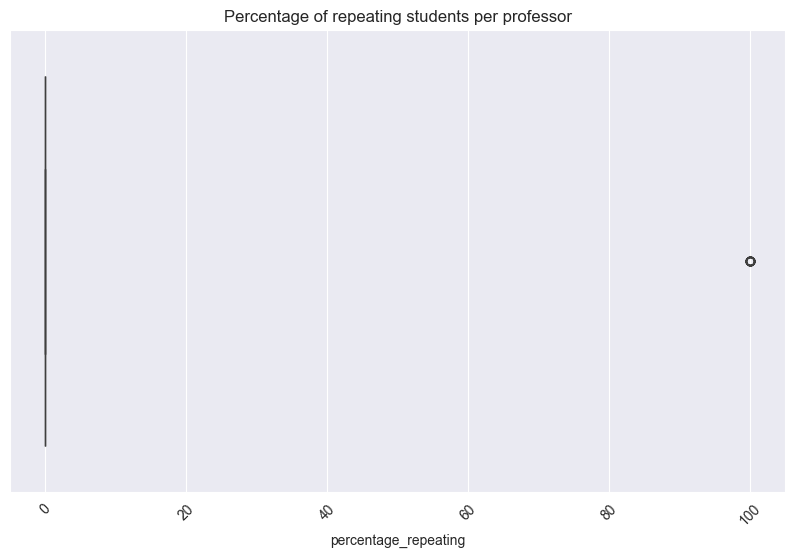

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='percentage_repeating', data=summary)
plt.title("Percentage of repeating students per professor")
plt.xlabel("percentage_repeating")
plt.xticks(rotation=45)
plt.show()

#del summary

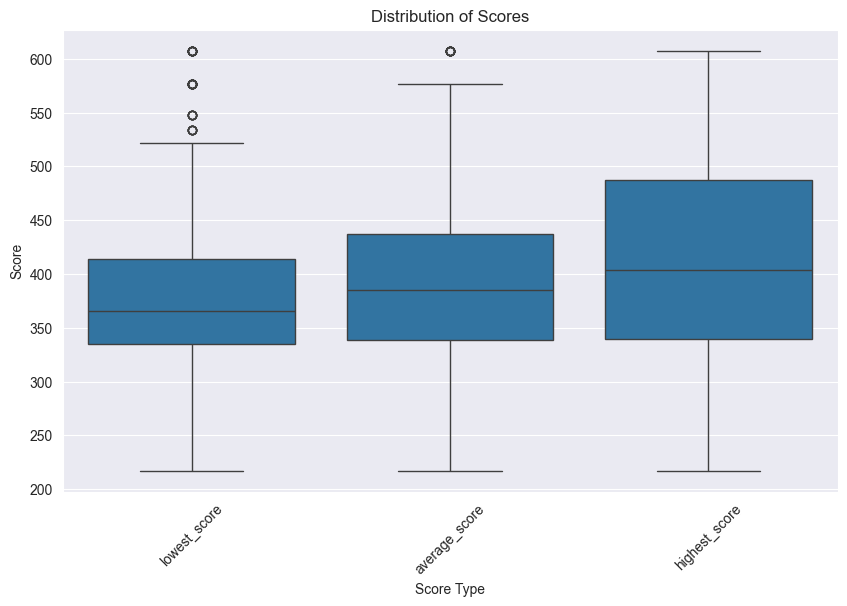

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

summary_long = teacher.melt(
    id_vars=['CNTTCHID'],
    value_vars=['lowest_score', 'average_score', 'highest_score'],
    var_name='Score Type',
    value_name='Score'
)

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score Type', y='Score', data=summary_long)
plt.title("Distribution of Scores")
plt.xlabel("Score Type")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


#del summary

In [108]:
def categorize_reading_teacher_by_student_performance(df):
    # Sort the DataFrame by 'Avg Reading Result' in descending order
    df = df.sort_values(by='Avg Reading Result', ascending=False).reset_index(drop=True)

    # Calculate the number of students
    total = len(df)

    # Define the percentage thresholds
    very_good_threshold = int(total * 0.90)
    good_threshold = int(total * 0.70)
    sufficient_threshold = int(total * 0.50)

    # Assign categories from highest to lowest
    df.loc[0:sufficient_threshold-1, 'Reading Score Classification'] = 'Insufficient (0-49%)'
    df.loc[sufficient_threshold:good_threshold-1, 'Reading Score Classification'] = 'Sufficient (50-69%)'
    df.loc[good_threshold:very_good_threshold-1, 'Reading Score Classification'] = 'Good (70-89%)'
    df.loc[very_good_threshold:, 'Reading Score Classification'] = 'Very Good (90-100%)'

    return df

teacher = categorize_reading_teacher_by_student_performance(teacher)

print("Number of students by classification")
print("Very Good (90-100%): ", len(teacher[teacher['Reading Score Classification']=="Very Good (90-100%)"]))
print("Good (70-89%): ", len(teacher[teacher['Reading Score Classification']=="Good (70-89%)"]))
print("Sufficient (50-69%): ", len(teacher[teacher['Reading Score Classification']=="Sufficient (50-69%)"]))
print("Insufficient (0-49%): ", len(teacher[teacher['Reading Score Classification']=="Insufficient (0-49%)"]))

Number of students by classification
Very Good (90-100%):  100
Good (70-89%):  200
Sufficient (50-69%):  200
Insufficient (0-49%):  500


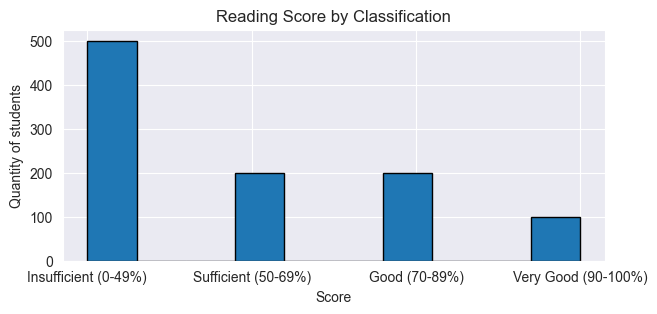

In [109]:
plt.figure(figsize=(7, 3))
plt.hist(teacher["Reading Score Classification"], edgecolor='black')
plt.title("Reading Score by Classification")
plt.ylabel("Quantity of students")
plt.xlabel("Score")
plt.show()

In [110]:
correl = (
    teacher.corr(numeric_only=True)["average_score"]
    .abs()
    .sort_values(ascending=False)
)

In [118]:
top_corr = correl.drop(["average_score","highest_score","lowest_score","Avg Reading Result"]).head(30)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,TC202Q05HA,0.303811,How often in your <test language lessons>: I t...
1,total_students,0.253425,Description not found
2,TCDIRINS,0.251860,Direct teacher's instruction (WLE)
3,TC170Q03HA,0.211356,How often in your <test language lessons>: I h...
4,TC171Q01HA,0.211037,How often in your <test language lessons>: I s...
5,W_SCHGRNRABWT,0.166355,GRADE NONRESPONSE ADJUSTED SCHOOL BASE WEIGHT
6,TC028Q01NA,0.162904,School's instruction hindered by: A lack of te...
7,TC170Q05HA,0.155314,How often in your <test language lessons>: Stu...
8,TC039Q01NA,0.153869,Is there any formal curriculum for <test langu...
9,TC150Q01HA,0.153860,"In your formal education and/or training, did ..."


In [112]:
correl = teacher[teacher['Reading Score Classification'] == "Very Good (90-100%)"].corr(numeric_only=True)['average_score'].sort_values(ascending=False)

top_corr = correl.drop(["average_score","highest_score","lowest_score","Avg Reading Result"]).head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,highest_score,0.984523,Description not found
1,total_students,0.832081,Description not found
2,lowest_score,0.763935,Description not found
3,Avg Reading Result,0.763935,Average Reading Result
4,TC157Q09HA,0.587976,How often do you ask students to: Determine th...
5,TC028Q03NA,0.562661,School's instruction hindered by: A lack of as...
6,TCSTAFFSHORT,0.545146,Teacher's view on staff shortage (WLE)
7,TC202Q01HA,0.497090,How often in your <test language lessons>: I t...
8,TC202Q05HA,0.475947,How often in your <test language lessons>: I t...
9,TC202Q06HA,0.472674,How often in your <test language lessons>: I g...


In [113]:
correl = teacher[teacher['Reading Score Classification'] == "Good (70-89%)"].corr(numeric_only=True)["average_score"].abs().sort_values(ascending=False)
top_corr = correl.drop(["average_score","highest_score","lowest_score","Avg Reading Result"]).head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,highest_score,0.918715,Description not found
1,lowest_score,0.575725,Description not found
2,TC150Q06HA,0.497815,"In your formal education and/or training, did ..."
3,Avg Reading Result,0.496896,Average Reading Result
4,total_students,0.480245,Description not found
5,TC204Q02HA,0.441039,"During the last 12 months, proportion of profe..."
6,TC168Q11HA,0.440704,"During the last month, asked students to use d..."
7,TC168Q10HA,0.432305,"During the last month, asked students to use d..."
8,TC168Q12HA,0.420746,"During the last month, asked students to use d..."
9,CNTSTUID,0.395060,Description not found


In [114]:
correl = teacher[teacher['Reading Score Classification'] == "Sufficient (50-69%)"].corr(numeric_only=True)["average_score"].abs().sort_values(ascending=False)
top_corr = correl.drop(["average_score","highest_score","lowest_score","Avg Reading Result"]).head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,highest_score,0.960935,Description not found
1,TC156Q05IA,0.540616,"In your <test language lessons>, how often: I ..."
2,Avg Reading Result,0.539441,Average Reading Result
3,lowest_score,0.522251,Description not found
4,TC167Q01HA,0.459644,"Within the last month, have digital devices [...."
5,TC157Q09HA,0.435672,How often do you ask students to: Determine th...
6,CNTSTUID,0.427995,Description not found
7,TC157Q02HA,0.421680,How often do you ask students to: Identify the...
8,TC163Q03HA,0.394112,How important do you consider teaching the fol...
9,TCSTRATREAD,0.388667,Teacher's initiation of reading strategies (WLE)


In [115]:
correl = teacher[teacher['Reading Score Classification'] == "Insufficient (0-49%)"].corr(numeric_only=True)["average_score"].abs().sort_values(ascending=False)
top_corr = correl.drop(["average_score","highest_score","lowest_score","Avg Reading Result"]).head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,lowest_score,0.910337,Description not found
1,highest_score,0.856391,Description not found
2,Avg Reading Result,0.830142,Average Reading Result
3,TC202Q05HA,0.303811,How often in your <test language lessons>: I t...
4,total_students,0.253425,Description not found
5,TCDIRINS,0.251860,Direct teacher's instruction (WLE)
6,TC170Q03HA,0.211356,How often in your <test language lessons>: I h...
7,TC171Q01HA,0.211037,How often in your <test language lessons>: I s...
8,W_SCHGRNRABWT,0.166355,GRADE NONRESPONSE ADJUSTED SCHOOL BASE WEIGHT
9,TC028Q01NA,0.162904,School's instruction hindered by: A lack of te...


## 2.4 Verify data quality


In [116]:
print("\n--- Missing Values ---")
missing = teacher.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0.7])


--- Missing Values ---
SEFFCM        1.000
SEFFREL       1.000
TC168Q08HA    0.860
TC150Q06HA    0.860
TC150Q07HA    0.859
              ...  
TC168Q03HA    0.854
TC168Q04HA    0.854
TC168Q05HA    0.854
TC168Q09HA    0.854
TC168Q11HA    0.854
Length: 79, dtype: float64
